In [74]:
import pyfolio as pf
import os
data_dir = 'ohlc_data'
symbols = ['EURUSD', 'AUDUSD', 'GBPUSD']

for i in symbols:
    data_path = os.path.join(os.getcwd(), data_dir, i, 'H1_'+i+'_2015.csv')
    print(data_path)
    df = pd.read_csv(data_path, index_col=0)
    
    # Convert Unix timestamps to datetime format
    df['Time'] = pd.to_datetime(df['time'], unit='s')
    
    if 'volume' not in df.columns:
        df.rename(columns={'open':'Open', 'high':'High', 'low':'Low', 'close':'Close', 'tick_volume':'Volume'}, inplace=True)
    else:
        df.rename(columns={'open':'Open', 'high':'High', 'low':'Low', 'close':'Close', 'volume':'Volume'}, inplace=True)

#     data = pd.read_csv(data_path, parse_dates=["Date"], index_col="Date")
    break

data = df
data['Date'] = data['Time']

C:\Users\iftek\AppData\Local\Programs\Python\Python310\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


D:\git_repos\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\EURUSD\H1_EURUSD_2015.csv


Total Original Sell Signals: 31
Total Original Buy Signals: 30
Filtered Signals: Signal
 0    4943
 1      29
-1      28
Name: count, dtype: int64


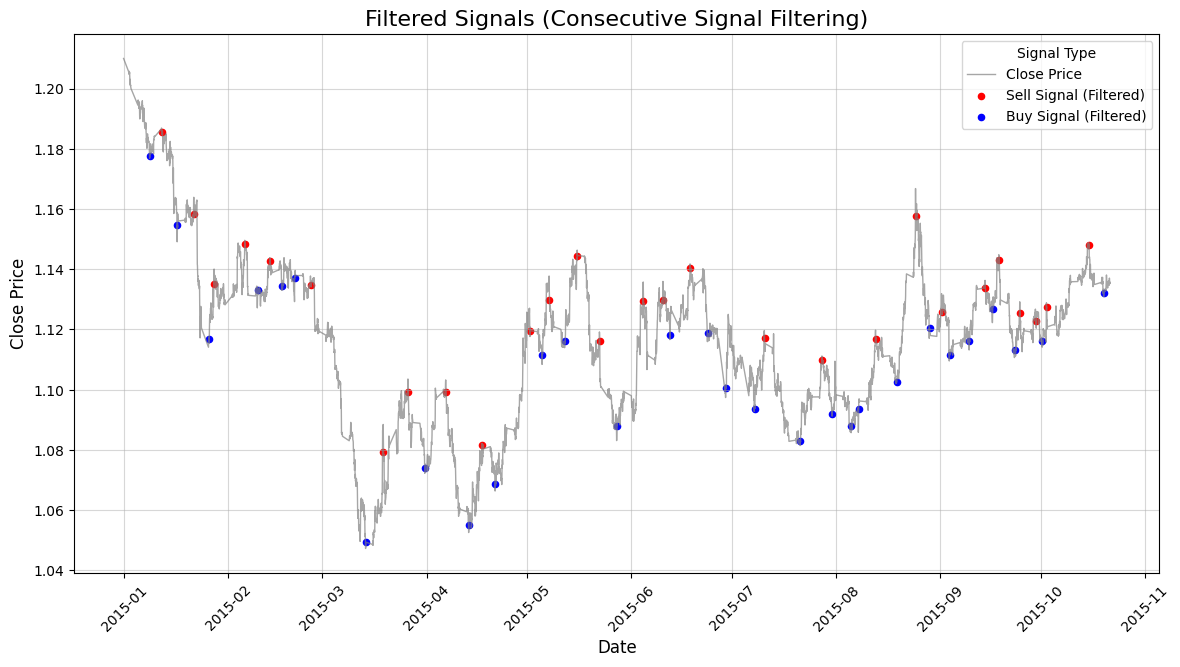

In [87]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'Date' and 'Close' columns
df = df.iloc[:5000]

# Identify local maxima and minima
local_maxima_indices = argrelextrema(df['Close'].values, np.greater, order=50)[0]
local_minima_indices = argrelextrema(df['Close'].values, np.less, order=50)[0]

# Shift signals 2 steps ahead
max_signal_indices = local_maxima_indices + 2
min_signal_indices = local_minima_indices + 2

# Ensure indices stay within bounds
max_signal_indices = max_signal_indices[max_signal_indices < len(df)]
min_signal_indices = min_signal_indices[min_signal_indices < len(df)]

# Initialize Signal column
df['Signal'] = 0
df.loc[max_signal_indices, 'Signal'] = -1  # Sell Signal
df.loc[min_signal_indices, 'Signal'] = 1   # Buy Signal

# Filtering consecutive signals
signal_indices = df[df['Signal'] != 0].index  # Get indices where signals exist
for i in range(1, len(signal_indices)):
    current_index = signal_indices[i]
    previous_index = signal_indices[i - 1]
    
    # Check for consecutive opposite signals within a short distance (e.g., 10 candles)
    if abs(current_index - previous_index) <= 30 and \
    df.loc[current_index, 'Signal'] != df.loc[previous_index, 'Signal']:
        # Replace both signals with 0
        df.loc[current_index, 'Signal'] = 0
#         df.loc[previous_index, 'Signal'] = 0

# Debugging Info
print(f"Total Original Sell Signals: {len(max_signal_indices)}")
print(f"Total Original Buy Signals: {len(min_signal_indices)}")
print(f"Filtered Signals: {df['Signal'].value_counts()}")

# Plot Close Prices and signals
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], c='gray', alpha=0.7, label='Close Price', linewidth=1)

# Plot Final Sell Signals
sell_signals = df[df['Signal'] == -1]
plt.scatter(sell_signals['Date'], sell_signals['Close'], c='red', label='Sell Signal (Filtered)', marker='o', s=20)

# Plot Final Buy Signals
buy_signals = df[df['Signal'] == 1]
plt.scatter(buy_signals['Date'], buy_signals['Close'], c='blue', label='Buy Signal (Filtered)', marker='o', s=20)

# Chart Customization
plt.title('Filtered Signals (Consecutive Signal Filtering)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Signal Type')
plt.grid(alpha=0.5)
plt.show()


In [48]:
df.drop(columns=['time', 'spread', 'real_volume', 'Cluster_Label'], inplace=True)

In [49]:
df

,Open,High,Low,Close,Volume,Time,Date,Percentage_Change,Signal
1,1.20481,1.20569,1.20479,1.20538,1254,2015-01-02 08:00:00,2015-01-02 08:00:00,-0.380995,Sell
2,1.20537,1.20574,1.20341,1.20553,3394,2015-01-02 09:00:00,2015-01-02 09:00:00,0.012444,None
3,1.20556,1.20689,1.20442,1.20469,4590,2015-01-02 10:00:00,2015-01-02 10:00:00,-0.069679,None
4,1.20468,1.20599,1.20380,1.20573,4335,2015-01-02 11:00:00,2015-01-02 11:00:00,0.086329,Sell
5,1.20573,1.20573,1.20415,1.20501,2731,2015-01-02 12:00:00,2015-01-02 12:00:00,-0.059715,None
...,...,...,...,...,...,...,...,...,...
61933,1.03816,1.03974,1.03770,1.03913,5104,2024-12-20 10:00:00,2024-12-20 10:00:00,0.092470,None
61934,1.03913,1.03915,1.03749,1.03817,4389,2024-12-20 11:00:00,2024-12-20 11:00:00,-0.092385,None
61935,1.03818,1.03921,1.03803,1.03908,3521,2024-12-20 12:00:00,2024-12-20 12:00:00,0.087654,None
61936,1.03908,1.03964,1.03785,1.03906,3663,2024-12-20 13:00:00,2024-12-20 13:00:00,-0.001925,None


In [50]:
# Replace None with 'Hold' in the Signal column
df['Signal'] = df['Signal'].fillna('Hold')

In [53]:
df['Signal'].value_counts()

Hold    61122
Buy       411
Sell      404
Name: Signal, dtype: int64

In [54]:
df.to_csv('Signal_EURUSD.csv')

In [70]:
# Create a copy of the Signal column
modified_signals = df['Signal'].values.copy()

# Initialize variables
previous_signal = None

# Iterate through the signals and modify them
for i in range(len(modified_signals)):
    if modified_signals[i] in ['Buy', 'Sell']:
        if previous_signal and previous_signal != modified_signals[i]:  # Transition detected
            modified_signals[i - 1] = 'Close'  # Insert "Close" before the current signal
        previous_signal = modified_signals[i]

# Assign the modified signals back to the DataFrame
df['Modified_Signal'] = modified_signals

# Print the modified signals for the first 200 rows
# print(df['Modified_Signal'].values[1:500])


In [72]:
print(df['Modified_Signal'].values[1:500])

['Hold' 'Hold' 'Sell' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold'
 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Sell' 'Hold' 'Hold' 'Hold' 'Hold'
 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold'
 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold'
 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold'
 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold'
 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold'
 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold'
 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold'
 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold'
 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold'
 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold'
 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Close' 'Buy' 'Hold'
 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold' 'Hold'
 'Hold

In [71]:
df['Modified_Signal']

1        Sell
2        Hold
3        Hold
4        Sell
5        Hold
         ... 
61933    Hold
61934    Hold
61935    Hold
61936    Hold
61937    Hold
Name: Modified_Signal, Length: 61937, dtype: object